In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now downloading the dataset

In [19]:
!wget https://cocl.us/concrete_data

--2020-07-05 10:19:36--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 119.81.168.75, 161.202.50.39, 119.81.168.76
Connecting to cocl.us (cocl.us)|119.81.168.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-07-05 10:19:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data.1’

concrete_data.1     100%[===================>]  57.61K   198KB/s    in 0.3s    

2020-07-05 10:19:38 (19

In [20]:
df = pd.read_csv('/content/concrete_data')
df.shape

(1030, 9)

In [21]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Installing heatmapz library to analyse the correlation

In [22]:
!pip install heatmapz

In [23]:
from heatmap import corrplot

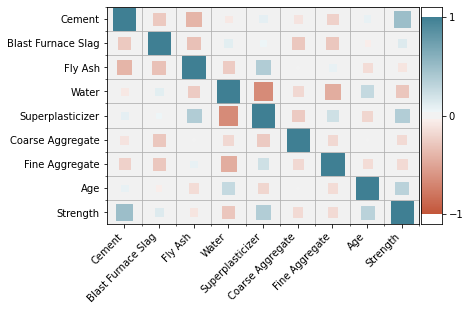

In [24]:
corr = df.corr()
corrplot(corr, size_scale=500,marker='s')

Seems all the predictors have good association!!

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Let's normalize X

In [26]:
normalized_X=(X-X.mean())/X.std()
normalized_X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=10)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Let's build the model😉😉😉

In [29]:
def regression_model():
  inputs = keras.Input(shape=(8,))
  dense1 = Dense(10, activation="relu", name="layer-1", input_shape=(8,))
  X = dense1(inputs)
  outputs = Dense(1, activation="linear", name="output")(X)
  model = keras.Model(inputs=inputs, outputs=outputs, name="regression_model")
  return model
regression_model().summary()

Model: "regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
layer-1 (Dense)              (None, 10)                90        
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = regression_model()
model.compile(
    optimizer="adam",
    loss="mse")

In [31]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,
    epochs=5,
    callbacks=None,
)

Epoch 1/5
721/721 [==============================] - 0s 327us/step - loss: 1505.8615
Epoch 2/5
721/721 [==============================] - 0s 210us/step - loss: 1472.3876
Epoch 3/5
721/721 [==============================] - 0s 198us/step - loss: 1437.9832
Epoch 4/5
721/721 [==============================] - 0s 177us/step - loss: 1401.4764
Epoch 5/5
721/721 [==============================] - 0s 184us/step - loss: 1362.8159


In [32]:
l = model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=10)

309/309 [==============================] - 0s 162us/step


In [33]:
print(l)

1352.0142719552741


Now running the model 50 times

In [34]:
loss = []

for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10+i)
  model = regression_model()
  model.compile(optimizer="adam", loss="mse")
  model.fit(x=X_train, y=y_train, batch_size=32, epochs=50,verbose=0, callbacks=None)
  l = model.evaluate(x=X_test, y=y_test, batch_size=10, verbose=0)
  loss.append(l)
  print(f'Trial:', i+1, 'MSE:', l)


Trial: 1 MSE: 254.91953284995068
Trial: 2 MSE: 168.01346891829112
Trial: 3 MSE: 577.4328440447069
Trial: 4 MSE: 295.00393212574585
Trial: 5 MSE: 122.22575491994716
Trial: 6 MSE: 86.33143391655487
Trial: 7 MSE: 174.5144895411618
Trial: 8 MSE: 1131.9640753786155
Trial: 9 MSE: 180.0662155398273
Trial: 10 MSE: 167.5570533530226
Trial: 11 MSE: 150.41746681484975
Trial: 12 MSE: 366.02196100228815
Trial: 13 MSE: 350.55720505205176
Trial: 14 MSE: 293.51024035111215
Trial: 15 MSE: 176.11887860838263
Trial: 16 MSE: 102.69755972704841
Trial: 17 MSE: 520.5530152552336
Trial: 18 MSE: 109.36559298123356
Trial: 19 MSE: 2144.5442813021464
Trial: 20 MSE: 1003.4117904712467
Trial: 21 MSE: 269.2573759702417
Trial: 22 MSE: 74.12064203243811
Trial: 23 MSE: 208.00022211661232
Trial: 24 MSE: 125.31495515891264
Trial: 25 MSE: 381.0973288526813
Trial: 26 MSE: 234.65506415999823
Trial: 27 MSE: 194.17590835719432
Trial: 28 MSE: 126.99951840990184
Trial: 29 MSE: 153.79192114030658
Trial: 30 MSE: 185.8983234047503

In [35]:
loss = np.array(loss)
len(loss)

50

In [36]:
print(f'Average mse:',np.average(loss))
print(f'Standard deviation:',np.std(loss))

Average mse: 294.56166821433504
Standard deviation: 335.1139124504676


The MSE improved little compared to 306.1712195 before normalization. But the Std increased from 302.66803 to 335.113912.